# 실습 3

In [52]:
#pandas, numpy 호출
import pandas as pd 
import numpy as np
#sklearn 호출
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets

In [53]:
df = pd.read_csv("wine.csv") #csv 데이터 입력, 칼럼인덱스 미사용
df.head(8) #불러온 데이터프레임 상위 8개값 호출

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


# 2) 데이터 전처리 시작

### 2-1) 목표변수로 할 Y값 분류

Quality list :  [5 6 7 4 8 3]
Quality list count :  [681, 638, 199, 53, 18, 10]


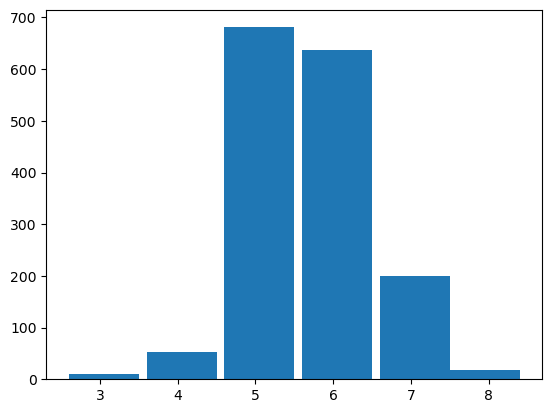

In [54]:
#칼럼에 유니크한 값 종류 추출 및 유니크한 값 카운트
quality_univalue = df['quality'].unique()
quality_unicount = df['quality'].value_counts().tolist() #df['quality'].value_counts().values 대체가능
print('Quality list : ',quality_univalue) # print(df.groupby(['quality']).quality.count().tolist()) 와 동일
print('Quality list count : ',quality_unicount)

#plot 라이브러리 호출
import matplotlib.pyplot as plot

#quality 열을 1차원 배열에 저장해 히스토그램으로 표시
data = np.array(df.iloc[:,11])
plot.hist(data,bins=10)

#바그래프 출력 (x값 , height 값)
plot.bar(quality_univalue, quality_unicount)
plot.show()

#### 목표변수값이 5,6 에 편향되어 있어 추후 3,4,7,8 에 대한 모델 분류가 쉽지 않을 것이 예상됨

### 2-2) 결과값 분류
#### 추후 ROC를 위해 클래스를 2개로만 함

In [55]:
#속성 매핑 전 데이터프레임 백업
df1 = df.copy()

divide = {3:0,4:0,5:0,6:1,7:1,8:1}
df["quality"] = df.quality.map(divide)

# 다른 방식(함수적용)
#def mapfunc(a):
#    if a>=7:
#        a = 'S'
#    elif a==6:
#        a = 'A'
#    elif a==5:
#        a = 'B'
#    else:
#        a = 'C'
#df["quality"].apply(mapfunc)
#또는 lambda 함수 사용
#df["quality"] = df.quality.map(lambda x: 'S' if x>=7 else 'A' if x==6 else 'B' if x==5 else 'C')

#인덱싱을 위해 column의 공백 '_' 로 대체
df.columns = df.columns.str.replace(' ','_')
#만약 데이터값 변경을 원하면 
#df['quality'].replace(바꾸고 싶은 값, 바꿀값, inplace = True)

df.head(7) #분류된 Quality 값 확인 및 Column 확인

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0


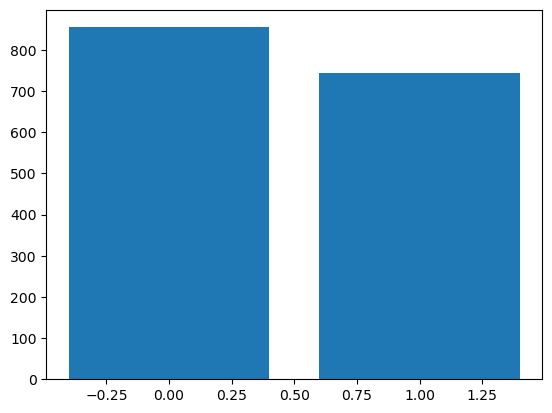

In [56]:
data = np.array(df.iloc[:,11])
#바그래프 출력(x값, height 값)
plot.bar(df['quality'].unique(), df['quality'].value_counts().tolist())
#plot.hist(data,bins=4) // 미사용, 2차원 데이터를 통째로 plot 에 히스토그램으로 넣을때
plot.show()

#### 목표변수 값이 A등급과 B등급에 편향되어 있는 것을 확인함

### 2-3) 결측치 확인

In [57]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### - 결측치 없음

### 2-4) 잡음 및 칼럼 제거

#### 각 요소별 분포도 히스토그램으로 표시

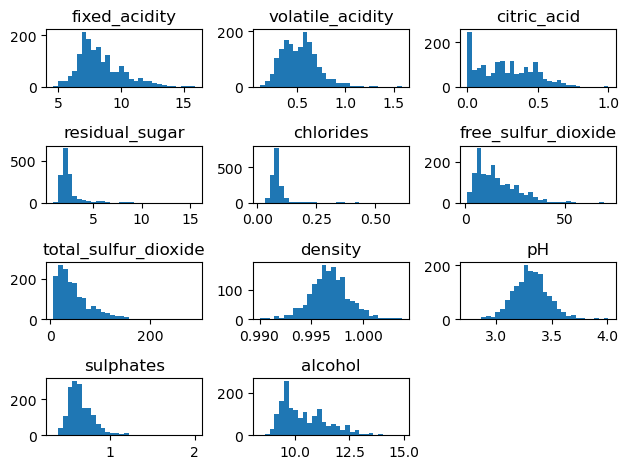

In [58]:
for i in range(df.shape[1]-1): # df.shape[1]-1 하여 Quality 칼럼은 미표시함
    data = np.array(df.iloc[:,i]) #각 열별로 1차원 Array 에 값 저장
    plot.subplot(4,3,i+1) # 4x3 서브플롯의 index 1부터 1차원 Array 값 입력
    plot.hist(data,bins=30)
    plot.title(df.columns[i]) #각 서브플롯별로 Title 을 df의 칼럼명으로 입력
    
plot.tight_layout() #서브플롯별로 겹치지 않게 Layout 설정
plot.show()

#### 편차치가 작은 residual sugar, chlorides 요소를 제거하기로 하였다

In [59]:
dfbkup = df.copy() #특정 칼럼 제거 전 데이터프레임 백업 (추후 전처리 이후 모델과 비교하기 위해)
df = df.drop(['residual_sugar', 'chlorides'],axis=1) #residual sugar, chlorides 칼럼 세로축으로 제거
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,15.0,54.0,0.9970,3.26,0.65,9.8,0


### 2-5) 상관계수 분석 및 제거

In [60]:
dfcorr=df1.corr() #상관계수 분석
dfcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

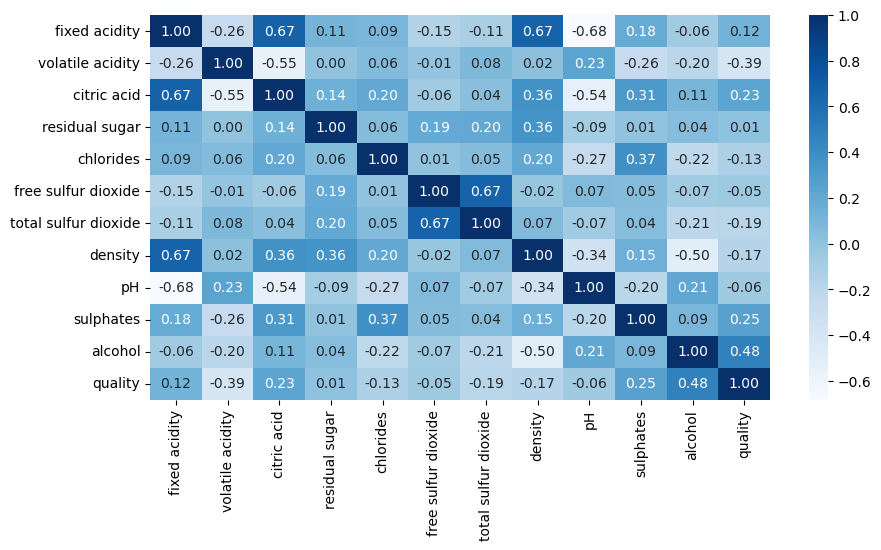

In [61]:
import seaborn as sns #seaborn 호출
plot.figure(figsize=(10,5)) #10x5 크기로 설정
sns.heatmap(data = dfcorr, annot=True, fmt = '0.2f', cmap='Blues')
#상관계수분석 기반 heatmap 작성, 수치(annot) 표시, 표시형식은 소숫점 2자리까지, 컬러는 블루

#### free sulfur dioxide와 pH의 quality 값에 대한 상관계수 절대값이 0.05와 0.06로 낮게 나타나 해당 칼럼 또한 배제하기로 함
#### 이미 제거한 residual sugar 값도 상관계수가 0.01로 상관도가 매우 낮게 나타남

In [62]:
df = df.drop(['free_sulfur_dioxide', 'pH'],axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,60.0,0.99800,0.58,9.8,1
4,7.4,0.700,0.00,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,51.0,0.99512,0.76,11.2,1
1596,6.3,0.510,0.13,40.0,0.99574,0.75,11.0,1
1597,5.9,0.645,0.12,44.0,0.99547,0.71,10.2,0


In [63]:
X = np.array(df.iloc[:,:7]) #처음~마지막-1개 칼럼 포함한 모든 행 집어넣기, 속성값 X로 저장
Y = np.array(df['quality']) #quality 값을 목표변수 Y로 저장

In [64]:
X #속성

array([[ 7.4    ,  0.7    ,  0.     , ...,  0.9978 ,  0.56   ,  9.4    ],
       [ 7.8    ,  0.88   ,  0.     , ...,  0.9968 ,  0.68   ,  9.8    ],
       [ 7.8    ,  0.76   ,  0.04   , ...,  0.997  ,  0.65   ,  9.8    ],
       ...,
       [ 6.3    ,  0.51   ,  0.13   , ...,  0.99574,  0.75   , 11.     ],
       [ 5.9    ,  0.645  ,  0.12   , ...,  0.99547,  0.71   , 10.2    ],
       [ 6.     ,  0.31   ,  0.47   , ...,  0.99549,  0.66   , 11.     ]])

In [65]:
Y #목표변수

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# 3)모델 적합

#### 훈련 데이터와 테스트 데이터 분리

In [66]:
# Split 라이브러리 호출
from sklearn.model_selection import train_test_split
#훈련시킬 데이터 세트와 테스트용 데이터 셋트로 데이터 구분(여기서는 약 10 대 3 로 분리)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)
#random_state : 랜덤으로 뽑는 방식 지정, 시드를 12345로 줌

#[훈련데이터]
print("X_train 크기:", X_train.shape)
print("Y_train 크기:", Y_train.shape)

#[테스트데이터]
print("X_test 크기:", X_test.shape)
print("Y_test 크기:", Y_test.shape)

X_train 크기: (1199, 7)
Y_train 크기: (1199,)
X_test 크기: (400, 7)
Y_test 크기: (400,)


#### 의사결정나무 모델 훈련

In [67]:
#의사결정나무 모델 라이브러리 호출
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10, random_state=12345)
#max_depth 제한 10(미지정 시 None 이 기본으로 과다하게 가지치기가 이뤄져 과대적합으로 테스트 데이터 예측 어려운 문제 발생할 수도 있음)

#훈련 데이터로 의사결정나무 모델을 훈련
tree.fit(X_train, Y_train)
#의사결정나무가 테스트 속성값으로 목표변수값을 예측하도록 함
y_pred_res = tree.predict(X_test)

# 4) 모델 성능평가

In [68]:
#훈련 데이터의 속성값으로 예측한 결과가 테스트 데이터의 목표변수와 얼마나 맞는지 평가

# Training 값을 X_test 에서 넣음
print("[예측값]\n", y_pred_res) #와인의 등급을 분류한 값
print("[실제값]\n", Y_test) #실제 와인의 등급값

[예측값]
 [0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1
 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0]
[실제값]
 [0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0
 0 1 1 1 0 1 0 0 1 0 1 0

## 4-1) 정확도 계산

In [69]:
#정확도 계산 모듈 호출
from sklearn.metrics import accuracy_score, confusion_matrix

#실제 값과 예측값 간 정확도 계산
#y_pred_res (예측한 걸 넣어둔 거랑) ytest (실제 결과) 사이의 정확도를 계산함
print('정확도: %0.2f%%' % (accuracy_score(Y_test, y_pred_res)*100))

정확도: 75.75%


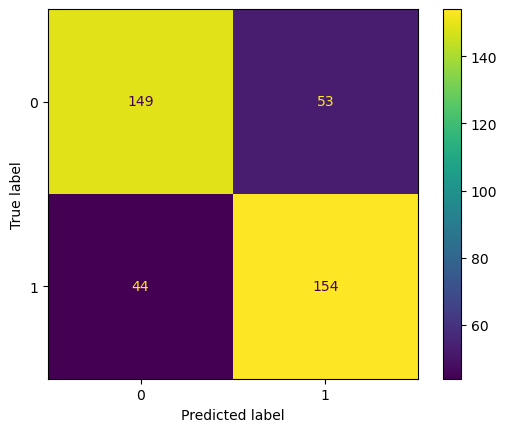

In [70]:
#오차행렬(Confusion Matrix) 
cmatrix = confusion_matrix(Y_test, y_pred_res)
#시각화 라이브러리 호출
from sklearn.metrics import ConfusionMatrixDisplay
cmatrix = ConfusionMatrixDisplay(cmatrix)
cmatrix.plot()
#왼쪽 위와 우측 아래가 잘 맞춘 경우(TT, TN))

In [71]:
# 측정 라이브러리 호출
from sklearn.metrics import precision_score, recall_score, f1_score

#정확도 계산 메소드
print('Accuracy: %0.4f'% accuracy_score(Y_test, y_pred_res))
print('Precision: %0.4f'% precision_score(Y_test, y_pred_res, average='macro'))
print('recall: %0.4f'% recall_score(Y_test, y_pred_res, average='macro'))
print('f1-score: %0.4f'% f1_score(Y_test, y_pred_res, average='macro'))
# Accuracy : TP + TN / Total
# Precision : TP / (TP + FP)
# recall : TP / (TP + FN)
# f1-score : 가중치 1일때

Accuracy: 0.7575
Precision: 0.7580
recall: 0.7577
f1-score: 0.7575


#### 모델의 정확도 : 67.75%
#### 모델의 정밀도 : 65.58%
#### 모델의 재현율 : 57.26%
#### 모델의 F1-score : 0.6016

In [72]:
#모델 성능 종합 평가 모듈 호출
from sklearn.metrics import classification_report

--------------------------------

# 분류 모델 성능 평가 (ROC 실습)

In [73]:
print(classification_report(Y_test, tree.predict(X_test)))
print('Accuracy: %0.4f'% accuracy_score(Y_test, tree.predict(X_test)))
print('Precision: %0.4f'% precision_score(Y_test, tree.predict(X_test), average='macro'))
print('recall: %0.4f'% recall_score(Y_test, tree.predict(X_test), average='macro'))
print('f1-score: %0.4f'% f1_score(Y_test,tree.predict(X_test), average='macro'))

from sklearn.metrics import accuracy_score, confusion_matrix
print('\n[오차행렬]\n')
print(confusion_matrix(Y_test, y_pred_res))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       202
           1       0.74      0.78      0.76       198

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400

Accuracy: 0.7575
Precision: 0.7580
recall: 0.7577
f1-score: 0.7575

[오차행렬]

[[149  53]
 [ 44 154]]


#### TN : 145 / TP : 154 / FN : 44 / FP : 53 이다.

### ROC 그래프 생성

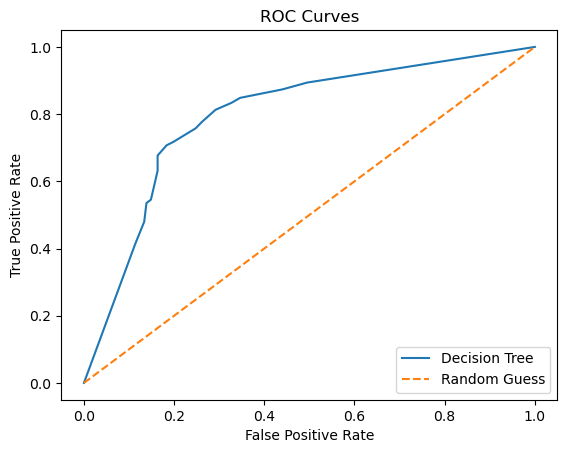

In [74]:
#ROC 커브 라이브러리 호출
from sklearn.metrics import roc_curve
#fpr 이 X값, tpr 이 Y값
# FPR : 잘못맞춤, 진짜라고, 그 비율
# TPR : 잘 맞춤, 진짜라고, 그 비율
fpr, tpr, thresholds = roc_curve(Y_test, tree.predict_proba(X_test)[:,1])


#ROC Curve 그래프 그리기
from matplotlib import pyplot as plt

#fpr 을 X축, tpr 를 Y축으로 그림
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
#랜덤으로 맞출 때(ROC가 0.5)일대
plt.plot([0,1],[0,1], '--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

#### 이 모델은 FPR(진짜라고 잘못 판단한 비율)의 증가량보다 TPR(진짜라고 맞게 판단한 비율)의 증가량이 더 크므로 랜덤으로 맞춘 것보다 좋은 모델이라 할 수 있다.

In [75]:
#AUC 계산
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
print('Area Under Curve : %0.2f' % roc_auc)

Area Under Curve : 0.80


#### 랜덤으로 맞출 때인 0.5 보다 0.3가량 ROC 커브 아래의 영역이 크므로 무작위모델보다 우수하다.